# Project: Predicting patients turnup for an event.

We'll be making use of the following classification algorithms:
* Logistic Regression
* Support Vector Machine
* Random Forest

In [1]:
#Basics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn ML
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC

# to save model
import pickle

In [2]:
# loading dataset
preprocessed = pd.read_csv('../data/enhanced.csv')
preprocessed.head()

,gender,hypertension,diabetes,handicap,show,scheduled_month,scheduled_day,appointment_month,appointment_day,neigbhorhood_2,neigbhorhood_5,neigbhorhood_7,neigbhorhood_8,age_groups
0,F,1,0,0,1,4,6,4,6,0,0,0,0,4
1,M,0,0,0,1,4,6,4,6,0,0,0,0,4
2,F,0,0,0,1,4,6,4,6,0,1,0,0,4
3,F,0,0,0,1,4,6,4,6,0,0,0,0,1
4,F,1,1,0,1,4,6,4,6,0,0,0,0,4


In [3]:
# creating a copy before preprocessing
df = preprocessed.copy()

In [4]:
# encode gender column to be '0' (Male) and '1' (Female)
df['gender'].replace(to_replace=['M', 'F'], value=['0', '1'], inplace=True)
df.head()

,gender,hypertension,diabetes,handicap,show,scheduled_month,scheduled_day,appointment_month,appointment_day,neigbhorhood_2,neigbhorhood_5,neigbhorhood_7,neigbhorhood_8,age_groups
0,1,1,0,0,1,4,6,4,6,0,0,0,0,4
1,0,0,0,0,1,4,6,4,6,0,0,0,0,4
2,1,0,0,0,1,4,6,4,6,0,1,0,0,4
3,1,0,0,0,1,4,6,4,6,0,0,0,0,1
4,1,1,1,0,1,4,6,4,6,0,0,0,0,4


Model Development

In [5]:
# separate x_inputs and y_targets variables
y_targets = df.show
x_inputs = df.drop(['show'], axis=1)

In [6]:
# create an object to subtract the mean and divide by the SD featurewise
show_scalar = StandardScaler()
show_scalar.fit(x_inputs)
scaled_inputs = show_scalar.transform(x_inputs)

In [7]:
# spilting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, y_targets, train_size=0.8, random_state= 100)

0.795892517868452
##################################################
##################################################
              precision    recall  f1-score   support

           0       0.39      0.01      0.02      4492
           1       0.80      1.00      0.89     17614

    accuracy                           0.80     22106
   macro avg       0.59      0.50      0.45     22106
weighted avg       0.72      0.80      0.71     22106



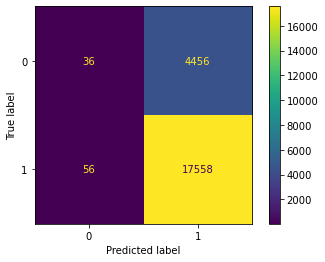

In [8]:
# define the hyperparameters to search
param_grid = {'C': [0.1,1,10], 'penalty': ['l1', 'l2']}

#Declare a logistic regression classifier using grid search
logistic_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
logistic_model.fit(x_train, y_train)

# The best set of hyperparameters
# print("Best hyperparameters:", logistic_model.best_params_)

#Make predictions on test data

prediction_logistic = logistic_model.predict(x_test)
# print(metrics.accuracy_score(y_test, prediction_logistic))
print(plot_confusion_matrix(logistic_model, x_test, y_test))
print('#' * 50)
print(metrics.classification_report(y_test, prediction_logistic))
#solver='liblinear', C=12, max_iter=1000

The accuracy iof the Random Forest Model is 77.59%
##################################################
##################################################
              precision    recall  f1-score   support

           0       0.36      0.14      0.20      4492
           1       0.81      0.94      0.87     17614

    accuracy                           0.78     22106
   macro avg       0.59      0.54      0.53     22106
weighted avg       0.72      0.78      0.73     22106



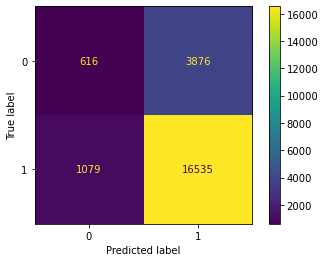

In [9]:
random_forest_model = DecisionTreeClassifier(random_state=1)
random_forest_model.fit(x_train, y_train)
prediction_random = random_forest_model.predict(x_test)
#random_forest_score = accuracy_score(y_test, prediction_random)*100
#print(f"The accuracy iof the Random Forest Model is {round(random_forest_score, 2)}%")
print(plot_confusion_matrix(random_forest_model, x_test, y_test))
print('#' * 50)
print(metrics.classification_report(y_test, prediction_random))

##################################################
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4492
           1       0.80      1.00      0.89     17614

    accuracy                           0.80     22106
   macro avg       0.90      0.50      0.44     22106
weighted avg       0.84      0.80      0.71     22106



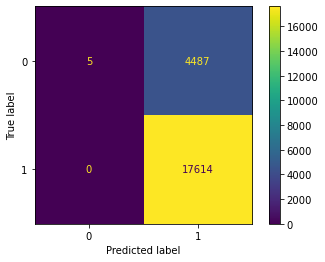

In [14]:
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
prediction_svm = model_svm.predict(x_test)
#print(f"The accuracy iof the Random Forest Model is {round(random_forest_score, 2)}%")
print(plot_confusion_matrix(model_svm, x_test, y_test))
print('#' * 50)
print(metrics.classification_report(y_test, prediction_svm))


In [11]:
data={'Name':['logistic Regression', 'Randome Forest', 'Support Vector Machine'], 'F1 Score':[0.89, 0.85, 0.89]}
pd.DataFrame(data)

,Name,F1 Score
0,logistic Regression,0.89
1,Randome Forest,0.85
2,Support Vector Machine,0.89


I went for the Logistics Regression model due to its's better classification report over SVM model.

### Save Model

In [12]:
with open('model', 'wb') as file:
    pickle.dump(logistic_model, file)

In [13]:
with open('scaler', 'wb') as file:
    pickle.dump(show_scalar,file)